In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import geonomics as gnx
import evodoodle as evo

NOTE: Module 'pykrige' not found. Yosemite demo 3d plots cannot be produced.
pygame 2.6.1 (SDL 2.30.7, Python 3.12.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


<frozen importlib._bootstrap>:488: RuntimeWarning: Your system is avx2 capable but pygame was not built with support for it. The performance of some of your blits could be adversely affected. Consider enabling compile time detection with environment variables like PYGAME_DETECT_AVX2=1 if you are compiling without cross compilation.


### 1. Draw your own landscape

In [4]:

# Draw your landscape carrying capacity
# When you run this chunk a pop-up will appear where you can draw on your own landscape
# Note: d sets the dimensions of your square landscape in terms of the number of cells
population_size = evo.draw_landscape(d = 10)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


In [5]:
# Draw your landscape connectivity
connectivity = evo.draw_landscape(d = 10)

ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


In [6]:

# Draw your environment for local adaptation
environment = evo.draw_landscape(d = 10)


ALSA lib confmisc.c:855:(parse_card) cannot find card '0'
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_card_inum returned error: No such file or directory
ALSA lib confmisc.c:422:(snd_func_concat) error evaluating strings
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_concat returned error: No such file or directory
ALSA lib confmisc.c:1342:(snd_func_refer) error evaluating name
ALSA lib conf.c:5204:(_snd_config_evaluate) function snd_func_refer returned error: No such file or directory
ALSA lib conf.c:5727:(snd_config_expand) Evaluate error: No such file or directory
ALSA lib pcm.c:2722:(snd_pcm_open_noupdate) Unknown PCM default


In [ ]:
%matplotlib inline
# You can plot all your landscapes using plot_landscapes()
evo.plot_landscapes(population_size, connectivity, environment)

In [ ]:
# If you want to change something, you can edit your landscapes using the edit_landscape() function (uncomment the line below)
# environment = evo.edit_landscape(environment)

In [ ]:

# Finally, you can optionally save your landscapes
np.savetxt('population_size.csv', population_size, delimiter=',')
np.savetxt('connectivity.csv', connectivity, delimiter=',')
np.savetxt('environment.csv', environment, delimiter=',')

# Uncomment these lines to read in landscapes
#population_size = np.loadtxt('population_size.csv', delimiter=',')
#connectivity = np.loadtxt('connectivity.csv', delimiter=',')
#environment = np.loadtxt('environment.csv', delimiter=',')

### 2. Play out evolution across your landscape

In [7]:
# To define the parameters of our model for Geonomics we need to have a parameters dictionary
# Evodoodle comes with an example parameters dictionary to start with:
params = evo.example_params()

# %%
# You can also create your own Geonomics parameters file by running gnx.make_parameters_file()
# Here we call this file "example_parameters" and it will automatically be saved to our working directory
gnx.make_parameters_file("example_parameters")
# You can manually edit this file to change the simulation parameters, just note that the landscape layers will be overwritten when we create our custom landscapes, so best to leave that section of the parameters alone

# You can then load your parameters python dictionary
from example_parameters import params
print(params)

# But for now we will use the example parameters
params = evo.example_params()

{'landscape': {'main': {'dim': (20, 20), 'res': (1, 1), 'ulc': (0, 0), 'prj': None}, 'layers': {'lyr_0': {'init': {'random': {'n_pts': 500, 'interp_method': 'linear'}}}}}, 'comm': {'species': {'spp_0': {'init': {'N': 250, 'K_layer': 'lyr_0', 'K_factor': 1}, 'mating': {'repro_age': 0, 'sex': False, 'sex_ratio': 1.0, 'R': 0.5, 'b': 0.2, 'n_births_distr_lambda': 1, 'n_births_fixed': True, 'mating_radius': 10, 'choose_nearest_mate': False, 'inverse_dist_mating': False}, 'mortality': {'max_age': None, 'd_min': 0, 'd_max': 1, 'density_grid_window_width': None}, 'movement': {'move': True, 'direction_distr_mu': 0, 'direction_distr_kappa': 0, 'movement_distance_distr_param1': 0.01, 'movement_distance_distr_param2': 0.5, 'movement_distance_distr': 'lognormal', 'dispersal_distance_distr_param1': -1, 'dispersal_distance_distr_param2': 0.05, 'dispersal_distance_distr': 'lognormal'}, 'gen_arch': {'gen_arch_file': None, 'L': 100, 'start_p_fixed': 0.5, 'start_neut_zero': False, 'mu_neut': 0, 'mu_delet

In [8]:

# Start model
mod = evo.init_mod(params, population_size, connectivity, environment)



MAKING MODEL...

	MAKING LANDSCAPE...

	MAKING COMMUNITY...

		MAKING SPECIES spp_0...

			making genomic architecture...



stty: 'standard input': Inappropriate ioctl for device


			making individuals...

			making movement surface...
				[can take a bit]



No mod.burn_fn_queue was found. Running mod.reset()...


Creating the burn-in function queue...


Creating the main function queue...


burn:	it=-1:	t=0
	species: spp_0                         N=320	(births=95	deaths=275)

	........................................................................
burn:	it=-1:	t=1
	species: spp_0                         N=294	(births=73	deaths=99)

	........................................................................
burn:	it=-1:	t=2
	species: spp_0                         N=276	(births=47	deaths=65)

	........................................................................
burn:	it=-1:	t=3
	species: spp_0                         N=276	(births=56	deaths=56)

	........................................................................
burn:	it=-1:	t=4
	species: spp_0                         N=252	(births=54	deaths=78)

	........................................................

/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=36
	species: spp_0                         N=175	(births=29	deaths=14)

	........................................................................
burn:	it=-1:	t=37
	species: spp_0                         N=174	(births=28	deaths=29)

	........................................................................
burn:	it=-1:	t=38
	species: spp_0                         N=181	(births=41	deaths=34)

	........................................................................
burn:	it=-1:	t=39
	species: spp_0                         N=185	(births=45	deaths=41)

	........................................................................
burn:	it=-1:	t=40
	species: spp_0                         N=175	(births=46	deaths=56)

	........................................................................
burn:	it=-1:	t=41
	species: spp_0                         N=182	(births=31	deaths=24)

	........................................................................


/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.

burn:	it=-1:	t=42
	species: spp_0                         N=186	(births=34	deaths=30)

	........................................................................
burn:	it=-1:	t=43
	species: spp_0                         N=174	(births=32	deaths=44)

	........................................................................
burn:	it=-1:	t=44
	species: spp_0                         N=177	(births=34	deaths=31)

	........................................................................
burn:	it=-1:	t=45
	species: spp_0                         N=165	(births=30	deaths=42)

	........................................................................
burn:	it=-1:	t=46
	species: spp_0                         N=168	(births=35	deaths=32)

	........................................................................
burn:	it=-1:	t=47
	species: spp_0                         N=165	(births=30	deaths=33)

	........................................................................


/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):
/opt/conda/lib/python3.12/site-packages/geonomics/sim/burnin.py:85: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  ttest_res = ttest(data[int(-num_timesteps_back):


burn:	it=-1:	t=48
	species: spp_0                         N=173	(births=32	deaths=24)

	........................................................................
burn:	it=-1:	t=49
	species: spp_0                         N=171	(births=32	deaths=34)

	........................................................................
burn:	it=-1:	t=50
	species: spp_0                         N=161	(births=24	deaths=34)

	........................................................................
burn:	it=-1:	t=51
	species: spp_0                         N=170	(births=35	deaths=26)

	........................................................................
burn:	it=-1:	t=52
	species: spp_0                         N=160	(births=34	deaths=44)

	........................................................................
burn:	it=-1:	t=53
	species: spp_0                         N=157	(births=30	deaths=33)

	........................................................................
burn:	it=-1:	t=54
	species: spp_0 

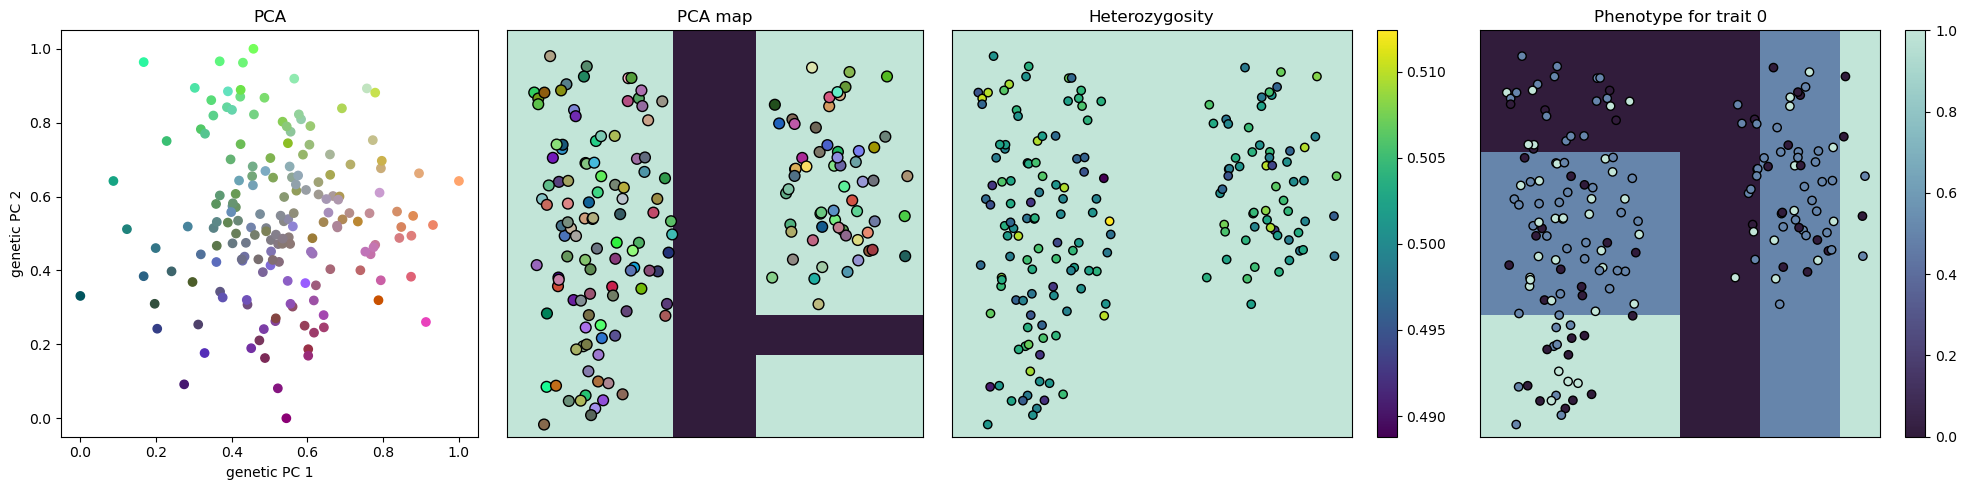

In [9]:
# Plot initial model (no selection has occurred yet)
evo.plot_popgen(mod)

Run your model and visualize the results:

In [ ]:
mod.walk(100)
evo.plot_popgen(mod)